In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
from string import Template

# Question 1

In [ ]:
def training_examples(boolean_function,inputs):
    Y = []
    X = []
    expression = Template(boolean_function)
    for y in inputs:
        substituted = expression.substitute({("x"+str(i)):y[i] for i in range(0,3)})
        result  = eval(substituted)
        Y.append([result])
        X.append([*y])
    return X,Y
    

In [ ]:
# define the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# derivative of the Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

In [ ]:
# Forward propagation
def forward_propagation(X,wh,bh,wout,bout):
    hidden_layer_input1=np.dot(X,wh)
    hidden_layer_input=hidden_layer_input1 + bh
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)
    return hiddenlayer_activations, output
    

In [ ]:
# Back propagation (for updating the weights and minimizing the error)
def back_propagation(y,output,hiddenlayer_activations,wout):
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = d_output.dot(wout.T)
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    return E,d_output, d_hiddenlayer
    
    
    

In [ ]:
def update_weights(wout,bout,wh,bh,X,hiddenlayer_activations,d_output, d_hiddenlayer,lr):
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
    return wout,bout,wh,bh
    

In [ ]:
def predict(X,wh,bh,wout,bout):
    _,output = forward_propagation(X,wh,bh,wout,bout)
    preds = np.array([[0]*1]*output.shape[0])
    for j in range(output.shape[0]):
        if output[j]>=0.5:
            preds[j] = 1
        else:
            preds[j]= 0
           
    return preds

In [ ]:
def neural_network(X,y):
    epoch=10000 # number of training iterations
    learning_rate = 0.4 # learning rate
    inputlayer = X.shape[1] # number of features in data set
    hiddenlayer = 4 # number of hidden layers neurons
    outputlayer = 1 # It is a boolean function

    # initialize weight and bias
    wh=np.random.uniform(size=(inputlayer,hiddenlayer))
    bh=np.random.uniform(size=(1,hiddenlayer))
    wout=np.random.uniform(size=(hiddenlayer,outputlayer))
    bout=np.random.uniform(size=(1,outputlayer))
    # training the model
    for i in range(epoch):
        hiddenlayer_activations, output = forward_propagation(X,wh,bh,wout,bout)
        E,d_output, d_hiddenlayer = back_propagation(y,output,hiddenlayer_activations,wout)
        wout,bout,wh,b = update_weights(wout,bout,wh,bh,X,hiddenlayer_activations,d_output, d_hiddenlayer,learning_rate)
        if(i%500==0):
            train_error=np.mean(np.abs(E))
            print("epoch {:5} ".format(i),end='-')
            print(' error:{:0.4f} '.format(train_error))
    
            
    preds= predict(X,wh,bh,wout,bout)
    print("input:")
    print(X)
    print("Expected output:")
    print(y)
    print("Predicted output")
    print(preds)
    count = 0
    for j in range(preds.shape[0]):
        if preds[j] == y[j]:
            count = count+1
    print("Accuracy:")
    print(count/preds.shape[0]*100)
    
    



In [ ]:
for i in range(5):
    boolean_function = input("Enter your variable function with three variables as $x0,$x1,$x2 using operators '&','|','^'.")
    #all possible combinations of input
    inputs = list(itertools.product([0, 1], repeat=3))
    print("\n")
    print("####################BOOLEAN FUNCTION : %d ##################"%(i+1))
    print("\n")
    print(boolean_function)
    print("\n")
    # y is the list of outputs corresponding to the input list
    X,y = training_examples(boolean_function,inputs)
    #convert X and y list into respective arrays for ease. 
    X = np.array(X)
    y = np.array(y)
    neural_network(X,y)

    

Enter your variable function with three variables as $x0,$x1,$x2 using operators '&','|','^'.$x0&$x1&$x2


####################BOOLEAN FUNCTION : 1 ##################


$x0&$x1&$x2


epoch     0 - error:0.7795 
epoch   500 - error:0.1611 
epoch  1000 - error:0.0412 
epoch  1500 - error:0.0253 
epoch  2000 - error:0.0192 
epoch  2500 - error:0.0159 
epoch  3000 - error:0.0138 
epoch  3500 - error:0.0123 
epoch  4000 - error:0.0112 
epoch  4500 - error:0.0103 
epoch  5000 - error:0.0096 
epoch  5500 - error:0.0090 
epoch  6000 - error:0.0085 
epoch  6500 - error:0.0080 
epoch  7000 - error:0.0077 
epoch  7500 - error:0.0073 
epoch  8000 - error:0.0070 
epoch  8500 - error:0.0068 
epoch  9000 - error:0.0065 
epoch  9500 - error:0.0063 
input:
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
Expected output:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
Predicted output
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]
Accuracy:
100.0
Enter your variable function with three varia

# Question 2


In [ ]:
# will generate a random instance of the frozen lake scenario and consequently will return the instance and the reward set accordingly
def generate_frozen_lake(N,M):
    S = np.full((N,N),'F', dtype= object)
    R = np.array([[0]*N]*N)
    S[0][0] = 'S'
    S[N-1][N-1] = 'G'
    R[N-1][N-1] = 100
    List = random.sample(range(1,N*N-1),M)
    for i in List:
        S[int(i/N)][i%N]='H'
        R[int(i/N)][i%N]= -100
    for i in range(N):
        for j in range(N):
            print(S[i][j],end=" ")
        print("\n")
    return S,R

    
    

In [ ]:
#set moving right = 0 (0,1); moving down = 1 (1,0); moving left = 2 (0,-1); moving up = 3 (-1,0)
list_actions = [(0,1),(1,0),(0,-1),(-1,0)]

In [ ]:
# states possible : 0 to (N*N - 1)
# Accordingly, row = current_state/N; column = current_state%N
def get_possible_actions(current_state,N):
    list_actions = [(0,1),(1,0),(0,-1),(-1,0)]
    valid_actions = []
    for index,action in enumerate(list_actions):
        x, y = action
        new_state_row = int(current_state/N)+x
        new_state_col = current_state%N+y
        if new_state_row>=0 and new_state_col>=0 and new_state_row<N and new_state_col<N:
            valid_actions.append(index)
    return valid_actions   
        
        
    

In [ ]:

def choose_action(epsilon,current_state,N, Q):
    list_actions = [(0,1),(1,0),(0,-1),(-1,0)] 
    valid_actions = get_possible_actions(current_state,N)
    if(random.uniform(0,1)< epsilon):
        return random.choice(valid_actions)
    else:
        Values = []
        for index,item in enumerate(Q[current_state,:]):
              if index in valid_actions:
                    Values.append(item)
        return valid_actions[np.argmax(Values)]  

In [ ]:
def max_Qvalue(Q,new_state,N):
    possible_actions = get_possible_actions(new_state,N)
    Values = []
    for index,item in enumerate(Q[new_state,:]):
        if index in possible_actions:
            Values.append(item)
    return max(Values)
    

In [ ]:
# Size of lake and number of holes will be taken as input. 
N = int(input('Enter the size of the lake'))
M = int(input('Enter the number of holes in the lake'))
S, R = generate_frozen_lake(N,M)



Enter the size of the lake 4
Enter the number of holes in the lake 4
S H F H 

F F F F 

F H F H 

F F F G 



I initially set the epsilon(exploration & exploitation) factor as 0.1. I realised that I was exploring way too less in the intial episodes and rather my model kept exploring even after my model completed sufficient number of episodes, which led to poor results. 
Hence, I did not want to keep my epsilon to be a constant value. I want to keep it high in the initial stages to allow it to explore. But once it has found the optimal path, I want it minimize the exploration. 
Therefore, I initally took epsilon = 0.99 and decreased it exponentially to the minimum value. 

In [ ]:
def train_model(S,R,N,alpha,lambdaa,Q):
    epsilon = 0.99
    num_episodes = 10000
    # Starting exploration probability 
    max_epsilon = 0.99  
    # Minimum exploration probability 
    min_epsilon = 0.001
    # Exponential decay rate for exploration 
    decay_rate = 0.001             
    rewards = []
    all_rewards = []
    final_reward = 0
    for i in range(num_episodes):
        reward_gain = 0
        current_state = 0
        while current_state!=(N*N-1):
            action_taken = choose_action(epsilon,current_state,N,Q)
            x,y = list_actions[action_taken]
            new_state_row = int(current_state/N)+x
            new_state_col = current_state%N+y
            new_state = new_state_row*N+new_state_col
            reward_gain += R[new_state_row][new_state_col]
            Q_max = max_Qvalue(Q,new_state,N)
            Q[current_state][action_taken]=(1-alpha)*Q[current_state][action_taken]+alpha*(R[new_state_row][new_state_col]+lambdaa*Q_max)
            if new_state==(N*N-1):
                break
            else:
                current_state = new_state  
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i)        
        rewards.append(reward_gain)
  
    
        if(i%100==0):
            print("Episode no. %d, epsilon=%f,  Avg reward:%f" %(i,epsilon,sum(rewards)/100))
            all_rewards.append(sum(rewards)/100)
            if i==7000:
                #for comparison for different alpha and lambdas
                final_reward = sum(rewards)/100
            rewards = []
        
    print(Q)
    return final_reward, all_rewards
    

In [ ]:
#paramters
alpha = 0.5
l1 = 0.99
Q = np.array([[0]*4]*(N*N))
final_reward, all_rewards = train_model(S,R,N,alpha,l1,Q)


Episode no. 0, epsilon=0.990000,  Avg reward:-15.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-756.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-541.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-348.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-189.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-156.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-92.000000
Episode no. 700, epsilon=0.492123,  Avg reward:-40.000000
Episode no. 800, epsilon=0.445386,  Avg reward:-17.000000
Episode no. 900, epsilon=0.403097,  Avg reward:0.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:28.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:22.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:32.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:59.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:49.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:53.000000
Episode no. 1600, epsilon=0.200676,  Avg reward:60.000000
Episode no. 1

Text(0, 0.5, 'Reward')

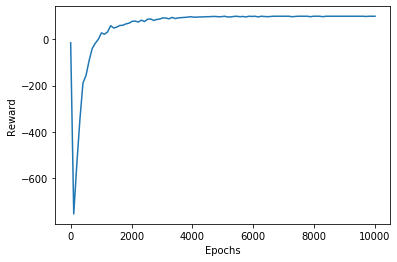

In [ ]:
episodes = np.linspace(0, 10000, 100)
plt.plot(episodes,all_rewards)
plt.xlabel("Epochs")
plt.ylabel("Reward")

In [ ]:
alpha_values =[]
y = []
for i in range(1,10):
    alphaa = i/10
    l2 = 0.99
    Q = np.array([[0]*4]*(N*N))
    alpha_values.append(alphaa)
    final_reward, all_rewards = train_model(S,R,N,alphaa,l2,Q)
    y.append(final_reward)
    

    

Episode no. 0, epsilon=0.990000,  Avg reward:-3.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-606.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-420.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-316.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-175.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-113.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-45.000000
Episode no. 700, epsilon=0.492123,  Avg reward:-65.000000
Episode no. 800, epsilon=0.445386,  Avg reward:1.000000
Episode no. 900, epsilon=0.403097,  Avg reward:-14.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:-21.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:15.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:30.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:48.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:52.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:47.000000
Episode no. 1600, epsilon=0.200676,  Avg reward:58.000000
Episode no. 1

Text(0, 0.5, 'Reward')

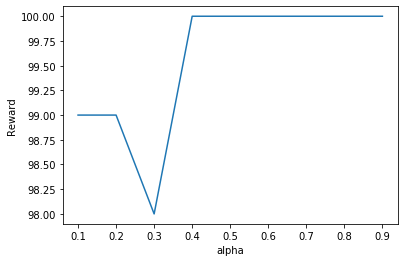

In [ ]:
plt.plot(alpha_values,y)
plt.xlabel("alpha")
plt.ylabel("Reward")   

reward more or less remains the same with change in the value of alpha. 

In [ ]:
lambda_values =[]
y_1 = []
for i in range(0,10):
    alphaa = 0.4
    l3 = i/10
    Q = np.array([[0]*4]*(N*N))
    lambda_values.append(l3)
    final_reward1, all_rewards = train_model(S,R,N,alphaa,l3,Q)
    y_1.append(final_reward1)


Episode no. 0, epsilon=0.990000,  Avg reward:-6.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-636.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-513.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-298.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-282.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-221.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-191.000000
Episode no. 700, epsilon=0.492123,  Avg reward:-143.000000
Episode no. 800, epsilon=0.445386,  Avg reward:-119.000000
Episode no. 900, epsilon=0.403097,  Avg reward:-127.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:-43.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:-72.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:-81.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:-68.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:-68.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:-28.000000
Episode no. 1600, epsilon=0.200676,  Avg reward:-52.000000
E

Text(0, 0.5, 'Reward')

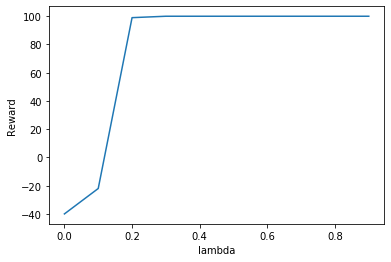

In [ ]:
plt.plot(lambda_values,y_1)
plt.xlabel("lambda")
plt.ylabel("Reward")

Performance decreases with decrease in the value of lambda

In [ ]:
N_values = []
N_rewards = []
for i in range(1,5):
    N = i*4
    N_values.append(N)
    S, R = generate_frozen_lake(N,5)
    alphaa = 0.4
    lambdaaa = 0.99
    Q = np.array([[0]*4]*(N*N))
    final_reward, all_rewards = train_model(S,R,N,alphaa,lambdaaa,Q)
    N_rewards.append(all_rewards)
   

S F F F 

H F F F 

F H H F 

F H H G 

Episode no. 0, epsilon=0.990000,  Avg reward:-19.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-836.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-597.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-345.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-190.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-178.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-91.000000
Episode no. 700, epsilon=0.492123,  Avg reward:-16.000000
Episode no. 800, epsilon=0.445386,  Avg reward:-14.000000
Episode no. 900, epsilon=0.403097,  Avg reward:-3.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:26.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:55.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:74.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:48.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:65.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:76.000000
Episode no. 1600, epsilon=0.20

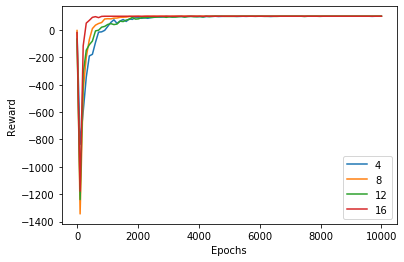

In [ ]:
episodes = np.linspace(0, 10000, 100)

for y_arr, label in zip(N_rewards,N_values):
    plt.plot(episodes, y_arr, label=label)
plt.xlabel("Epochs")
plt.ylabel("Reward")
plt.legend()
plt.show()    


In [ ]:
M_values = []
M_rewards = []
M = 1
for i in range(4):
    N = 6
    M = M+3

    M_values.append(M)
    S, R = generate_frozen_lake(N,M)
    alphaa = 0.4
    lambdaaa = 0.99
    Q = np.array([[0]*4]*(N*N))
    final_reward, all_rewards = train_model(S,R,N,alphaa,lambdaaa,Q)
    M_rewards.append(all_rewards)
   

S F F F F F 

H F F F F F 

F F F F F F 

H F F H F F 

F F F F F F 

F F F F H G 

Episode no. 0, epsilon=0.990000,  Avg reward:-9.000000
Episode no. 100, epsilon=0.895884,  Avg reward:-904.000000
Episode no. 200, epsilon=0.810725,  Avg reward:-362.000000
Episode no. 300, epsilon=0.733669,  Avg reward:-141.000000
Episode no. 400, epsilon=0.663947,  Avg reward:-82.000000
Episode no. 500, epsilon=0.600859,  Avg reward:-6.000000
Episode no. 600, epsilon=0.543775,  Avg reward:-26.000000
Episode no. 700, epsilon=0.492123,  Avg reward:34.000000
Episode no. 800, epsilon=0.445386,  Avg reward:37.000000
Episode no. 900, epsilon=0.403097,  Avg reward:72.000000
Episode no. 1000, epsilon=0.364833,  Avg reward:72.000000
Episode no. 1100, epsilon=0.330210,  Avg reward:76.000000
Episode no. 1200, epsilon=0.298881,  Avg reward:77.000000
Episode no. 1300, epsilon=0.270534,  Avg reward:70.000000
Episode no. 1400, epsilon=0.244884,  Avg reward:76.000000
Episode no. 1500, epsilon=0.221676,  Avg reward:83

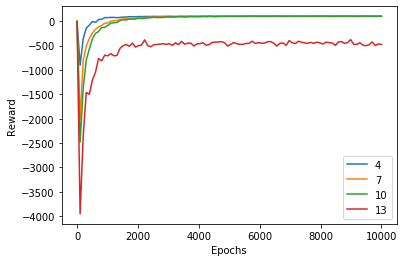

In [ ]:
episodes = np.linspace(0, 10000, 100)

for y_arr, label in zip(M_rewards,M_values):
    plt.plot(episodes, y_arr, label=label)
plt.xlabel("Epochs")
plt.ylabel("Reward")
plt.legend()
plt.show() 

So we can see from the above graph that, for given size N, the ability to find the optimum path reduces with increase in number of holes(M)

# Question 3

In [15]:
def rulkov_map(x,y,alpha,mu,sigma):
    y_new = y -mu*(x+1)+ mu*sigma
    x_new = 0
    if x<=0:
        x_new = (alpha/(1-x))+y
    elif x>0 and x<alpha+y:
        x_new = alpha+y
    else:
        x_new = -1
    return x_new,y_new

![Screenshot%20from%202021-03-29%2021-42-17.png](attachment:Screenshot%20from%202021-03-29%2021-42-17.png)

so we will choose the parameters according to the figure shown above.

In [28]:
tsteps = []
xlist = []
x = -1.0
y = 0
for i in range(4000):
    tsteps.append(i+1)
    x_new,y_new = rulkov_map(x,y,6.0,0.001,0.002)
    xlist.append(x_new)
    x = x_new
    y = y_new
    
    

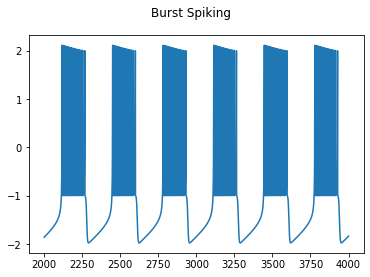

In [32]:
plt.plot(tsteps[2000:],xlist[2000:])
plt.suptitle("Burst Spiking")
plt.show()

In [39]:
tsteps = []
xlist = []
x = -1.0
y = 0
for i in range(4000):
    tsteps.append(i+1)
    x_new,y_new = rulkov_map(x,y,2.0,0.001,0.002)
    xlist.append(x_new)
    x = x_new
    y = y_new
    


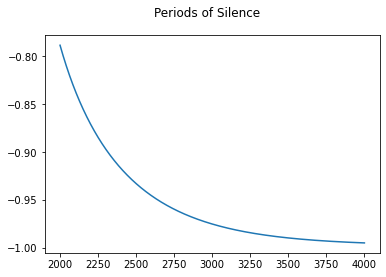

In [41]:
plt.plot(tsteps[2000:],xlist[2000:])
plt.suptitle("Periods of Silence")
plt.show()

In [113]:
tsteps = []
xlist = []
x = -1.0
y = 0
for i in range(4000):
    tsteps.append(i+1)
    x_new,y_new = rulkov_map(x,y,2.0,0.001,0.2)
    xlist.append(x_new)
    x = x_new
    y = y_new
    


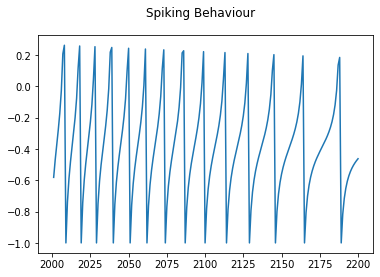

In [116]:
plt.plot(tsteps[2000:2200],xlist[2000:2200])
plt.suptitle("Spiking Behaviour")
plt.show()